In [21]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [23]:
tf.keras.backend.clear_session()

In [24]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [25]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [26]:
subject = 'Rondônia - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [27]:
data = pd.read_csv('2003_raw_Rondônia_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Rondônia - PIB - Per Capita,Rondônia - PIB - Preços de Mercado,Rondônia - PIB - Estadual,Rondônia - PIB - Construção Civil,Rondônia - População,Rondônia - INCC (%),Rondônia - IPCA - Variação mensal durante o Plano Real (%),Rondônia - IGP-DI,Rondônia - Taxa Selic (%),Rondônia - IDH - Longevidade,Rondônia - IDH - Renda,Rondônia - IDH - Educação,Rondônia - NFSP - Fluxo Mensal (Milhões de reais),Rondônia - Estoque liquido de capital fixo - (R$),Rondônia - Desemprego,Rondônia - Produção de Cimento (t),Rondônia - Valor,Rondônia - Consumo de Cimento (t)
0,2003-01-01,1.049277e+06,5.523249e+05,0.732849,1.138406e+06,1431777.0,1.70,12.53,2.70,0.082293,0.688,0.654,0.345,3.46,6.098524e+06,6.878789,NaN,0.47,13867.0
1,2003-02-01,1.049277e+06,5.523249e+05,0.732849,1.138406e+06,1431777.0,1.51,2.25,2.17,0.088771,0.688,0.654,0.345,3.59,6.172460e+06,6.878789,27544.0,0.51,10777.0
2,2003-03-01,1.049277e+06,5.523249e+05,0.732849,1.138406e+06,1431777.0,1.39,3.86,1.59,0.090733,0.688,0.654,0.345,3.84,6.172460e+06,6.878789,55610.0,0.51,13888.0
3,2003-04-01,1.049277e+06,5.523249e+05,0.732849,1.138406e+06,1431777.0,1.38,5.13,1.66,0.092749,0.688,0.654,0.345,3.95,6.172460e+06,6.878789,131225.0,0.49,11859.0
4,2003-05-01,1.049277e+06,5.523249e+05,0.732849,1.138406e+06,1431777.0,0.90,6.15,0.41,0.092758,0.688,0.654,0.345,4.06,6.172460e+06,6.878789,52764.0,0.49,14431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,1.988323e+06,3.354982e+06,1.131279,8.037372e+05,1757589.0,0.58,2.42,-0.01,0.024620,0.780,0.700,0.700,0.69,7.827728e+06,12.300000,67783.0,0.66,40300.0
200,2019-09-01,1.988323e+06,3.354982e+06,1.131279,8.037372e+05,1757589.0,0.42,2.54,-0.51,0.022751,0.780,0.700,0.700,0.62,7.827728e+06,12.000000,NaN,0.66,35493.0
201,2019-10-01,1.988323e+06,3.354982e+06,1.131279,8.037372e+05,1757589.0,0.46,2.49,0.50,0.022035,0.780,0.700,0.700,0.59,7.827728e+06,11.900000,71600.0,0.67,38489.0
202,2019-11-01,1.988323e+06,3.354982e+06,1.131279,8.037372e+05,1757589.0,0.18,2.60,0.55,0.020790,0.780,0.700,0.700,0.57,7.827728e+06,11.700000,13027.0,0.68,35591.0


In [28]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      21.211
1      15.823
2      15.195
3      15.479
4      18.536
        ...  
199       NaN
200       NaN
201       NaN
202       NaN
203       NaN
Name: Rondônia - Consumo de Cimento (t), Length: 204, dtype: float64

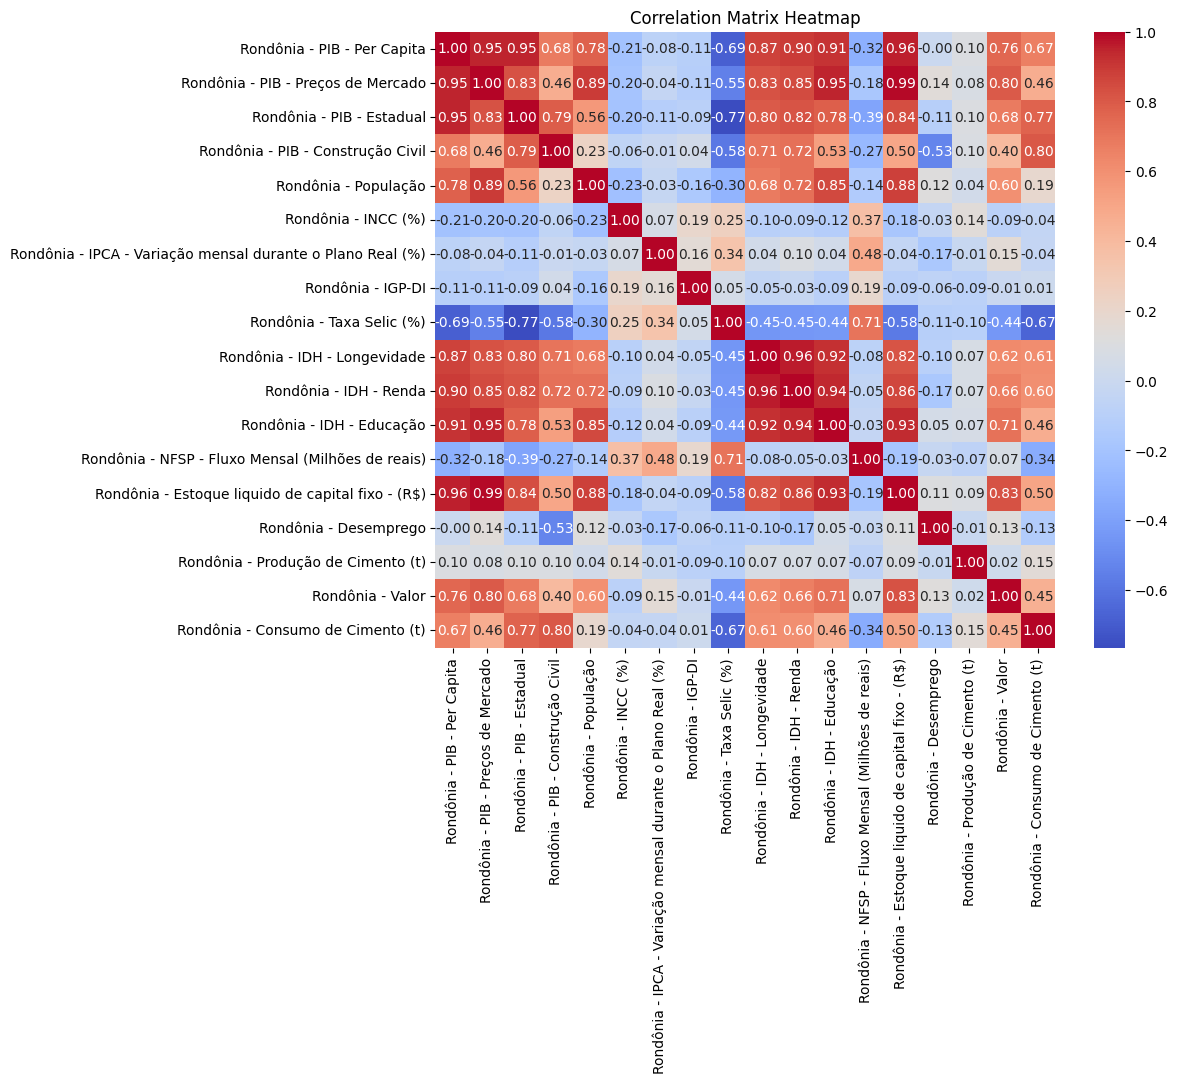

In [29]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [30]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(0.0)
input_data

,Rondônia - PIB - Per Capita,Rondônia - PIB - Preços de Mercado,Rondônia - PIB - Estadual,Rondônia - PIB - Construção Civil,Rondônia - População,Rondônia - INCC (%),Rondônia - IPCA - Variação mensal durante o Plano Real (%),Rondônia - IGP-DI,Rondônia - Taxa Selic (%),Rondônia - IDH - Longevidade,Rondônia - IDH - Renda,Rondônia - IDH - Educação,Rondônia - NFSP - Fluxo Mensal (Milhões de reais),Rondônia - Estoque liquido de capital fixo - (R$),Rondônia - Desemprego,Rondônia - Produção de Cimento (t),Rondônia - Valor
0,-1.728784,-1.379956,-1.661007,-0.864652,-1.323757,1.998868,4.052332,3.466715,2.303195,-0.907839,-0.918608,-0.919704,3.108599,-1.539424,-0.612537,0.000000,-0.455556
1,-1.728784,-1.379956,-1.661007,-0.864652,-1.323757,1.647487,-0.596188,2.630940,2.745235,-0.907839,-0.918608,-0.919704,3.275709,-1.411460,-0.612537,-0.559693,0.027013
2,-1.728784,-1.379956,-1.661007,-0.864652,-1.323757,1.425561,0.131839,1.716318,2.879123,-0.907839,-0.918608,-0.919704,3.597074,-1.411460,-0.612537,-0.450392,0.027013
3,-1.728784,-1.379956,-1.661007,-0.864652,-1.323757,1.407068,0.706121,1.826703,3.016721,-0.907839,-0.918608,-0.919704,3.738475,-1.411460,-0.612537,-0.155913,-0.214272
4,-1.728784,-1.379956,-1.661007,-0.864652,-1.323757,0.519367,1.167355,-0.144465,3.017322,-0.907839,-0.918608,-0.919704,3.879875,-1.411460,-0.612537,-0.461475,-0.214272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.056355,1.739903,0.544925,-0.928951,1.768923,-0.590259,-0.966985,-1.264088,-0.729479,0.910796,0.373184,1.485282,-0.374997,1.441346,2.455119,-0.234846,0.871510
176,1.056355,1.739903,0.544925,-0.928951,1.768923,-0.479297,-0.881068,-0.412544,-0.941281,0.910796,0.373184,1.485282,-0.439270,1.441346,2.455119,-0.583301,0.871510
177,1.056355,1.739903,0.544925,-0.928951,1.768923,-1.034110,-0.808718,0.186692,-1.140710,0.910796,0.373184,1.485282,-0.503543,1.441346,2.455119,-0.359955,0.992152
178,1.056355,1.739903,0.544925,-0.928951,1.768923,-0.571766,-0.614276,-0.633314,-1.226481,0.910796,0.373184,1.485282,-0.503543,1.441346,2.516213,-0.594412,1.112795


In [31]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Rondônia - PIB - Per Capita,Rondônia - PIB - Preços de Mercado,Rondônia - PIB - Estadual,Rondônia - PIB - Construção Civil,Rondônia - População,Rondônia - INCC (%),Rondônia - IPCA - Variação mensal durante o Plano Real (%),Rondônia - IGP-DI,Rondônia - Taxa Selic (%),Rondônia - IDH - Longevidade,Rondônia - IDH - Renda,Rondônia - IDH - Educação,Rondônia - NFSP - Fluxo Mensal (Milhões de reais),Rondônia - Estoque liquido de capital fixo - (R$),Rondônia - Desemprego,Rondônia - Produção de Cimento (t),Rondônia - Valor
0,-1.728784,-1.379956,-1.661007,-0.864652,-1.323757,1.998868,4.052332,3.466715,2.303195,-0.907839,-0.918608,-0.919704,3.108599,-1.539424,-0.612537,0.000000,-0.455556
1,-1.728784,-1.379956,-1.661007,-0.864652,-1.323757,1.647487,-0.596188,2.630940,2.745235,-0.907839,-0.918608,-0.919704,3.275709,-1.411460,-0.612537,-0.559693,0.027013
2,-1.728784,-1.379956,-1.661007,-0.864652,-1.323757,1.425561,0.131839,1.716318,2.879123,-0.907839,-0.918608,-0.919704,3.597074,-1.411460,-0.612537,-0.450392,0.027013
3,-1.728784,-1.379956,-1.661007,-0.864652,-1.323757,1.407068,0.706121,1.826703,3.016721,-0.907839,-0.918608,-0.919704,3.738475,-1.411460,-0.612537,-0.155913,-0.214272
4,-1.728784,-1.379956,-1.661007,-0.864652,-1.323757,0.519367,1.167355,-0.144465,3.017322,-0.907839,-0.918608,-0.919704,3.879875,-1.411460,-0.612537,-0.461475,-0.214272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.025686,1.434962,0.588341,-0.081437,1.602980,-0.238878,0.629248,-1.406012,0.272188,0.910796,1.162613,1.276153,0.794771,1.416222,0.622301,0.000000,0.992152
164,1.025686,1.434962,0.588341,-0.081437,1.602980,-0.608753,0.837256,-0.112926,0.272188,0.910796,1.162613,1.276153,0.730498,1.416222,0.683395,0.000000,0.992152
165,1.025686,1.434962,0.588341,-0.081437,1.602980,-0.534778,0.877953,-0.743700,0.272188,0.910796,1.162613,1.276153,0.743353,1.416222,0.744489,0.000000,0.992152
166,1.025686,1.434962,0.588341,-0.081437,1.602980,-0.756703,1.000045,-0.586006,0.248413,0.910796,1.162613,1.276153,0.614807,1.416222,0.744489,0.000000,1.233437


In [32]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      21.211
1      15.823
2      15.195
3      15.479
4      18.536
        ...  
163    39.293
164    41.610
165    43.544
166    35.658
167    29.693
Name: Rondônia - Consumo de Cimento (t), Length: 168, dtype: float64

In [33]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [34]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [35]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Rondônia - PIB - Per Capita,Rondônia - PIB - Preços de Mercado,Rondônia - PIB - Estadual,Rondônia - PIB - Construção Civil,Rondônia - População,Rondônia - INCC (%),Rondônia - IPCA - Variação mensal durante o Plano Real (%),Rondônia - IGP-DI,Rondônia - Taxa Selic (%),Rondônia - IDH - Longevidade,Rondônia - IDH - Renda,Rondônia - IDH - Educação,Rondônia - NFSP - Fluxo Mensal (Milhões de reais),Rondônia - Estoque liquido de capital fixo - (R$),Rondônia - Desemprego,Rondônia - Produção de Cimento (t),Rondônia - Valor
132,0.937373,0.904723,0.653661,0.468353,1.255089,-0.960135,1.058830,0.297077,-0.755853,0.689011,1.162613,0.997314,-0.285015,0.834026,-0.355202,-0.526174,0.871510
133,0.937373,0.904723,0.653661,0.468353,1.255089,0.482379,-1.364912,-0.160234,-0.688658,0.689011,1.162613,0.997314,-0.349288,1.129318,-0.049732,0.000000,0.871510
134,0.937373,0.904723,0.653661,0.468353,1.255089,-0.534778,-1.052901,0.549386,-0.626634,0.689011,1.162613,0.997314,-0.374997,1.129318,0.133549,0.000000,0.992152
135,0.937373,0.904723,0.653661,0.468353,1.255089,-0.627247,-0.627842,1.542855,-0.571481,0.689011,1.162613,0.997314,-0.259306,1.129318,0.011362,0.000000,0.992152
136,0.937373,0.904723,0.653661,0.468353,1.255089,0.482379,-0.320352,-0.081387,-0.516512,0.689011,1.162613,0.997314,-0.053632,1.129318,-0.110826,0.000000,0.750868
137,0.937373,0.904723,0.653661,0.468353,1.255089,2.646150,-0.107822,-1.500628,-0.510405,0.689011,1.162613,0.997314,0.023495,1.129318,-0.233014,0.000000,0.871510
138,0.937373,0.904723,0.653661,0.468353,1.255089,0.075516,0.082098,-1.784477,-0.510405,0.689011,1.162613,0.997314,-0.002214,1.129318,-0.294108,0.000000,1.354080
139,0.937373,0.904723,0.653661,0.468353,1.255089,0.241960,0.086620,-1.658322,-0.510405,0.689011,1.162613,0.997314,-0.143614,1.129318,-0.416296,0.000000,1.233437
140,0.937373,0.904723,0.653661,0.468353,1.255089,-0.997122,0.204189,-0.696392,-0.510054,0.689011,1.162613,0.997314,-0.182178,1.129318,-0.538484,0.000000,1.233437
141,0.937373,0.904723,0.653661,0.468353,1.255089,-0.867666,0.470982,-0.759469,-0.510405,0.689011,1.162613,0.997314,-0.105051,1.129318,-0.660672,0.000000,1.233437


In [36]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [37]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [38]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(144, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.14,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [39]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [40]:
winner_seed = get_a_good_seed(reshaped_train, 
                              reshaped_target, 
                              reshaped_test, 
                              reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[120834765, 2514234693, 1726720041, 3490923309, 4083579789, 1203008823, 3547502700, 4112876239, 786084798, 1795262194]


Step: 0 ___________________________________________
val_loss: 27.256803512573242
winner_seed: 120834765


Step: 1 ___________________________________________
val_loss: 34.6824951171875


Step: 2 ___________________________________________
val_loss: 45.3780632019043


Step: 3 ___________________________________________
val_loss: 33.56267166137695


Step: 4 ___________________________________________
val_loss: 30.485652923583984


Step: 5 ___________________________________________
val_loss: 78.9979019165039


Step: 6 ___________________________________________
val_loss: 24.66625213623047
winner_seed: 3547502700


Step: 7 ___________________________________________
val_loss: 33.549964904785156


Step: 8 ___________________________________________
val_loss: 33.848472595214844


Step: 9 ___________________________________________
val_loss: 39.32640075683594


final_seed:

In [41]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)

Epoch 1/10000
4/4 [==============================] - 2s 116ms/step - loss: 3069.1248 - val_loss: 394.9922
Epoch 2/10000
4/4 [==============================] - 0s 7ms/step - loss: 520.2527 - val_loss: 134.4735
Epoch 3/10000
4/4 [==============================] - 0s 8ms/step - loss: 529.6509 - val_loss: 1168.4377
Epoch 4/10000
4/4 [==============================] - 0s 7ms/step - loss: 501.7477 - val_loss: 663.9784
Epoch 5/10000
4/4 [==============================] - 0s 8ms/step - loss: 485.7276 - val_loss: 136.7145
Epoch 6/10000
4/4 [==============================] - 0s 8ms/step - loss: 382.0705 - val_loss: 646.9972
Epoch 7/10000
4/4 [==============================] - 0s 7ms/step - loss: 710.1520 - val_loss: 519.1730
Epoch 8/10000
4/4 [==============================] - 0s 7ms/step - loss: 417.9832 - val_loss: 304.8785
Epoch 9/10000
4/4 [==============================] - 0s 7ms/step - loss: 270.6914 - val_loss: 237.0545
Epoch 10/10000
4/4 [==============================] - 0s 8ms/step - l

4/4 [==============================] - 0s 8ms/step - loss: 28.6202 - val_loss: 46.3610
Epoch 82/10000
4/4 [==============================] - 0s 8ms/step - loss: 31.4912 - val_loss: 45.7733
Epoch 83/10000
4/4 [==============================] - 0s 8ms/step - loss: 33.7587 - val_loss: 45.1221
Epoch 84/10000
4/4 [==============================] - 0s 9ms/step - loss: 31.6616 - val_loss: 44.6492
Epoch 85/10000
4/4 [==============================] - 0s 8ms/step - loss: 37.4064 - val_loss: 42.0497
Epoch 86/10000
4/4 [==============================] - 0s 8ms/step - loss: 27.7773 - val_loss: 44.8790
Epoch 87/10000
4/4 [==============================] - 0s 8ms/step - loss: 27.5874 - val_loss: 45.5950
Epoch 88/10000
4/4 [==============================] - 0s 8ms/step - loss: 36.5762 - val_loss: 61.4334
Epoch 89/10000
4/4 [==============================] - 0s 9ms/step - loss: 40.0296 - val_loss: 59.1355
Epoch 90/10000
4/4 [==============================] - 0s 9ms/step - loss: 28.5576 - val_loss: 50.

Epoch 161/10000
4/4 [==============================] - 0s 7ms/step - loss: 12.9234 - val_loss: 43.6978
Epoch 162/10000
4/4 [==============================] - 0s 8ms/step - loss: 18.0466 - val_loss: 44.2101
Epoch 163/10000
4/4 [==============================] - 0s 8ms/step - loss: 15.9924 - val_loss: 42.8392
Epoch 164/10000
4/4 [==============================] - 0s 8ms/step - loss: 15.6071 - val_loss: 43.0901
Epoch 165/10000
4/4 [==============================] - 0s 8ms/step - loss: 14.5067 - val_loss: 45.0675
Epoch 166/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.3331 - val_loss: 49.9143
Epoch 167/10000
4/4 [==============================] - 0s 7ms/step - loss: 15.2198 - val_loss: 43.0451
Epoch 168/10000
4/4 [==============================] - 0s 7ms/step - loss: 19.3594 - val_loss: 37.0499
Epoch 169/10000
4/4 [==============================] - 0s 7ms/step - loss: 16.6083 - val_loss: 39.9932
Epoch 170/10000
4/4 [==============================] - 0s 7ms/step - loss

4/4 [==============================] - 0s 9ms/step - loss: 10.1337 - val_loss: 41.5410
Epoch 241/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.7248 - val_loss: 41.1641
Epoch 242/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.8014 - val_loss: 44.4901
Epoch 243/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.2233 - val_loss: 42.6324
Epoch 244/10000
4/4 [==============================] - 0s 8ms/step - loss: 12.3465 - val_loss: 40.2247
Epoch 245/10000
4/4 [==============================] - 0s 8ms/step - loss: 10.6210 - val_loss: 41.8162
Epoch 246/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.4452 - val_loss: 39.1219
Epoch 247/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.7412 - val_loss: 46.1324
Epoch 248/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.4702 - val_loss: 41.7367
Epoch 249/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.4942 - val_loss

Epoch 320/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.8991 - val_loss: 44.3642
Epoch 321/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.3450 - val_loss: 42.6777
Epoch 322/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.2660 - val_loss: 41.4009
Epoch 323/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5323 - val_loss: 44.1159
Epoch 324/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.1672 - val_loss: 46.4337
Epoch 325/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.8364 - val_loss: 43.3761
Epoch 326/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.1621 - val_loss: 41.3605
Epoch 327/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.7157 - val_loss: 44.3036
Epoch 328/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.7964 - val_loss: 43.8830
Epoch 329/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.47

4/4 [==============================] - 0s 8ms/step - loss: 8.4532 - val_loss: 39.9160
Epoch 401/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.1404 - val_loss: 43.1854
Epoch 402/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.6952 - val_loss: 41.9496
Epoch 403/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.1495 - val_loss: 40.5944
Epoch 404/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.5634 - val_loss: 42.6096
Epoch 405/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9608 - val_loss: 38.7663
Epoch 406/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.8601 - val_loss: 44.7486
Epoch 407/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.4778 - val_loss: 38.4952
Epoch 408/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.8453 - val_loss: 42.4905
Epoch 409/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.3856 - val_loss: 40.

4/4 [==============================] - 0s 10ms/step - loss: 7.3163 - val_loss: 42.7117
Epoch 481/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.2556 - val_loss: 39.2936
Epoch 482/10000
4/4 [==============================] - 0s 8ms/step - loss: 6.9218 - val_loss: 40.6180
Epoch 483/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.9872 - val_loss: 38.5201
Epoch 484/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.2294 - val_loss: 41.1824
Epoch 485/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.0168 - val_loss: 41.9758
Epoch 486/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.3544 - val_loss: 40.5221
Epoch 487/10000
4/4 [==============================] - 0s 8ms/step - loss: 6.6878 - val_loss: 42.6816
Epoch 488/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.8205 - val_loss: 39.0620
Epoch 489/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.9794 - val_loss: 38.

4/4 [==============================] - 0s 8ms/step - loss: 6.3350 - val_loss: 41.5903
Epoch 561/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.5751 - val_loss: 38.8083
Epoch 562/10000
4/4 [==============================] - 0s 7ms/step - loss: 7.1316 - val_loss: 37.6985
Epoch 563/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.8174 - val_loss: 40.6931
Epoch 564/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.8691 - val_loss: 38.3762
Epoch 565/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.1304 - val_loss: 36.4826
Epoch 566/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.1176 - val_loss: 37.3027
Epoch 567/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.6388 - val_loss: 38.7773
Epoch 568/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.9590 - val_loss: 37.3746
Epoch 569/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.3483 - val_loss: 39

4/4 [==============================] - 0s 11ms/step - loss: 5.3754 - val_loss: 36.7976
Epoch 641/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.1203 - val_loss: 37.8394
Epoch 642/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.4100 - val_loss: 36.3881
Epoch 643/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.4277 - val_loss: 38.3204
Epoch 644/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.1440 - val_loss: 35.8725
Epoch 645/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.9256 - val_loss: 35.4302
Epoch 646/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.5693 - val_loss: 35.3162
Epoch 647/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.0054 - val_loss: 36.2144
Epoch 648/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.8942 - val_loss: 37.0537
Epoch 649/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.1655 - val_l

Epoch 720/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.9197 - val_loss: 35.5794
Epoch 721/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.5135 - val_loss: 36.8913
Epoch 722/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.2905 - val_loss: 36.7166
Epoch 723/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.3723 - val_loss: 36.0375
Epoch 724/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.7544 - val_loss: 36.7898
Epoch 725/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.3555 - val_loss: 35.8681
Epoch 726/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.9605 - val_loss: 37.6118
Epoch 727/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.1512 - val_loss: 38.0255
Epoch 728/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.2809 - val_loss: 40.7940
Epoch 729/10000
4/4 [==============================] - 0s 11ms/step - los

4/4 [==============================] - 0s 9ms/step - loss: 5.7577 - val_loss: 34.4789
Epoch 800/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.5750 - val_loss: 35.3090
Epoch 801/10000
4/4 [==============================] - 0s 14ms/step - loss: 4.1184 - val_loss: 34.7353
Epoch 802/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.8567 - val_loss: 35.4120
Epoch 803/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8223 - val_loss: 34.7314
Epoch 804/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.2889 - val_loss: 35.0221
Epoch 805/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.6555 - val_loss: 34.9061
Epoch 806/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.6724 - val_loss: 40.4750
Epoch 807/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.7988 - val_loss: 35.0799
Epoch 808/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7237 - val_l

Epoch 879/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.7773 - val_loss: 34.4500
Epoch 880/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.2862 - val_loss: 33.9006
Epoch 881/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.1019 - val_loss: 34.1614
Epoch 882/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.9019 - val_loss: 33.9709
Epoch 883/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.1510 - val_loss: 35.2595
Epoch 884/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.3274 - val_loss: 35.2621
Epoch 885/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.0354 - val_loss: 33.2378
Epoch 886/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.9588 - val_loss: 34.4728
Epoch 887/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.9307 - val_loss: 33.6650
Epoch 888/10000
4/4 [==============================] - 0s 10ms/step - loss:

Epoch 959/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.0956 - val_loss: 33.8133
Epoch 960/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.5789 - val_loss: 33.5288
Epoch 961/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.4883 - val_loss: 33.0326
Epoch 962/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.0318 - val_loss: 33.0987
Epoch 963/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.6069 - val_loss: 32.6445
Epoch 964/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7812 - val_loss: 34.0442
Epoch 965/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.7100 - val_loss: 32.4738
Epoch 966/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.5130 - val_loss: 33.4001
Epoch 967/10000
4/4 [==============================] - 0s 13ms/step - loss: 5.7881 - val_loss: 32.6204
Epoch 968/10000
4/4 [==============================] - 0s 10ms/step - loss: 

4/4 [==============================] - 0s 9ms/step - loss: 4.5920 - val_loss: 32.1558
Epoch 1039/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.6133 - val_loss: 32.5556
Epoch 1040/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7766 - val_loss: 32.6771
Epoch 1041/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.3165 - val_loss: 32.7376
Epoch 1042/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.2161 - val_loss: 32.2398
Epoch 1043/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7880 - val_loss: 31.6409
Epoch 1044/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.0009 - val_loss: 34.9152
Epoch 1045/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.4633 - val_loss: 34.2954
Epoch 1046/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.2687 - val_loss: 34.2421
Epoch 1047/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.2099

4/4 [==============================] - 0s 10ms/step - loss: 4.8485 - val_loss: 33.5608
Epoch 1118/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.2254 - val_loss: 33.9185
Epoch 1119/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.2425 - val_loss: 32.6300
Epoch 1120/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.4619 - val_loss: 31.7399
Epoch 1121/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8064 - val_loss: 32.4829
Epoch 1122/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.0262 - val_loss: 31.8426
Epoch 1123/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.6777 - val_loss: 33.0680
Epoch 1124/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.3848 - val_loss: 32.6053
Epoch 1125/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.2181 - val_loss: 31.8288
Epoch 1126/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.3556 -

4/4 [==============================] - 0s 9ms/step - loss: 4.2625 - val_loss: 32.5443
Epoch 1197/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.2694 - val_loss: 32.5546
Epoch 1198/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.6404 - val_loss: 31.9462
Epoch 1199/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.6331 - val_loss: 32.7784
Epoch 1200/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.3754 - val_loss: 32.1480
Epoch 1201/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7353 - val_loss: 32.0764
Epoch 1202/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.5238 - val_loss: 32.8803
Epoch 1203/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.7658 - val_loss: 32.5216
Epoch 1204/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.9424 - val_loss: 32.3900
Epoch 1205/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8641 - 

4/4 [==============================] - 0s 11ms/step - loss: 4.4741 - val_loss: 30.9386
Epoch 1276/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.6789 - val_loss: 30.8063
Epoch 1277/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.4098 - val_loss: 32.3679
Epoch 1278/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.2114 - val_loss: 32.2768
Epoch 1279/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.3950 - val_loss: 31.5703
Epoch 1280/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.2195 - val_loss: 31.6029
Epoch 1281/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.5701 - val_loss: 32.2352
Epoch 1282/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.0140 - val_loss: 32.5368
Epoch 1283/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.5313 - val_loss: 32.0949
Epoch 1284/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.1873 - 

4/4 [==============================] - 0s 10ms/step - loss: 3.8319 - val_loss: 31.4938
Epoch 1355/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.2042 - val_loss: 31.3234
Epoch 1356/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.5711 - val_loss: 32.2364
Epoch 1357/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.9828 - val_loss: 31.3279
Epoch 1358/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.0687 - val_loss: 31.8051
Epoch 1359/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.5894 - val_loss: 32.6321
Epoch 1360/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.8014 - val_loss: 31.5398
Epoch 1361/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.7129 - val_loss: 32.9680
Epoch 1362/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.3540 - val_loss: 32.5939
Epoch 1363/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.4670 

4/4 [==============================] - 0s 10ms/step - loss: 3.6515 - val_loss: 32.1506
Epoch 1434/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.7999 - val_loss: 32.8986
Epoch 1435/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.6646 - val_loss: 31.7652
Epoch 1436/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.9452 - val_loss: 31.8280
Epoch 1437/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.8936 - val_loss: 32.2449
Epoch 1438/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.0169 - val_loss: 31.1028
Epoch 1439/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.0945 - val_loss: 31.3978
Epoch 1440/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.0963 - val_loss: 31.2596
Epoch 1441/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.6296 - val_loss: 30.5647
Epoch 1442/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.2038 - v

4/4 [==============================] - 0s 10ms/step - loss: 3.8759 - val_loss: 31.2586
Epoch 1513/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.7223 - val_loss: 31.3799
Epoch 1514/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.3687 - val_loss: 31.6606
Epoch 1515/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.7013 - val_loss: 31.1562
Epoch 1516/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.2136 - val_loss: 31.0123
Epoch 1517/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.0693 - val_loss: 32.5987
Epoch 1518/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.1307 - val_loss: 31.3549
Epoch 1519/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.2078 - val_loss: 30.5636
Epoch 1520/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.9960 - val_loss: 31.0877
Epoch 1521/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.8703 - val

4/4 [==============================] - 0s 9ms/step - loss: 3.9677 - val_loss: 31.1025
Epoch 1592/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.0479 - val_loss: 30.9201
Epoch 1593/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.2396 - val_loss: 31.3929
Epoch 1594/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.3531 - val_loss: 31.2675
Epoch 1595/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.1252 - val_loss: 31.5813
Epoch 1596/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.4076 - val_loss: 31.9217
Epoch 1597/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3608 - val_loss: 31.6369
Epoch 1598/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.8424 - val_loss: 31.8564
Epoch 1599/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.7123 - val_loss: 31.3990
Epoch 1600/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.8101 - v

4/4 [==============================] - 0s 8ms/step - loss: 4.3326 - val_loss: 31.3280
Epoch 1671/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.8584 - val_loss: 32.2446
Epoch 1672/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.6048 - val_loss: 30.7982
Epoch 1673/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.9704 - val_loss: 29.0218
Epoch 1674/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.3702 - val_loss: 29.8441
Epoch 1675/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.0935 - val_loss: 30.3449
Epoch 1676/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.9622 - val_loss: 29.4273
Epoch 1677/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.2366 - val_loss: 29.5416
Epoch 1678/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.7379 - val_loss: 30.6358
Epoch 1679/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.5064 

4/4 [==============================] - 0s 9ms/step - loss: 3.4418 - val_loss: 29.7658
Epoch 1750/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.2170 - val_loss: 29.9142
Epoch 1751/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.3582 - val_loss: 29.5525
Epoch 1752/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.7273 - val_loss: 29.3601
Epoch 1753/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.5376 - val_loss: 29.6525
Epoch 1754/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.2778 - val_loss: 29.4309
Epoch 1755/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.6624 - val_loss: 30.3866
Epoch 1756/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.9643 - val_loss: 30.1201
Epoch 1757/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.9203 - val_loss: 31.2783
Epoch 1758/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.4371 -

4/4 [==============================] - 0s 9ms/step - loss: 3.6774 - val_loss: 29.3456
Epoch 1829/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.4244 - val_loss: 29.7275
Epoch 1830/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8636 - val_loss: 28.9458
Epoch 1831/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.4134 - val_loss: 29.6272
Epoch 1832/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.6967 - val_loss: 28.8756
Epoch 1833/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.7579 - val_loss: 29.4015
Epoch 1834/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.4090 - val_loss: 29.1683
Epoch 1835/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.7739 - val_loss: 29.1014
Epoch 1836/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.9823 - val_loss: 31.0586
Epoch 1837/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.9294 - 

4/4 [==============================] - 0s 8ms/step - loss: 3.3413 - val_loss: 28.4264
Epoch 1908/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.7929 - val_loss: 28.9234
Epoch 1909/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.4286 - val_loss: 28.5663
Epoch 1910/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.0141 - val_loss: 29.1072
Epoch 1911/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.6626 - val_loss: 29.1233
Epoch 1912/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.6033 - val_loss: 29.4269
Epoch 1913/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.8349 - val_loss: 29.4226
Epoch 1914/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.2251 - val_loss: 29.1508
Epoch 1915/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.4044 - val_loss: 29.1156
Epoch 1916/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.2851 - va

4/4 [==============================] - 0s 8ms/step - loss: 3.6482 - val_loss: 29.5752
Epoch 1987/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.2316 - val_loss: 29.0520
Epoch 1988/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.1577 - val_loss: 29.1343
Epoch 1989/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.4233 - val_loss: 29.2394
Epoch 1990/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.1810 - val_loss: 29.3202
Epoch 1991/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.6562 - val_loss: 29.9006
Epoch 1992/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.7020 - val_loss: 28.7091
Epoch 1993/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.1343 - val_loss: 29.0719
Epoch 1994/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.1062 - val_loss: 28.4958
Epoch 1995/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.3199 - val_l

4/4 [==============================] - 0s 10ms/step - loss: 3.5802 - val_loss: 28.6195
Epoch 2066/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.0631 - val_loss: 29.0311
Epoch 2067/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.7861 - val_loss: 29.2819
Epoch 2068/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.5373 - val_loss: 28.7497
Epoch 2069/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8583 - val_loss: 28.8469
Epoch 2070/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.9652 - val_loss: 28.4383
Epoch 2071/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.5673 - val_loss: 28.9868
Epoch 2072/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.1258 - val_loss: 28.1695
Epoch 2073/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.4108 - val_loss: 28.1970
Epoch 2074/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.6867 -

4/4 [==============================] - 0s 8ms/step - loss: 3.9166 - val_loss: 29.2564
Epoch 2145/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.2989 - val_loss: 28.8224
Epoch 2146/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.3316 - val_loss: 29.8083
Epoch 2147/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.2277 - val_loss: 29.0107
Epoch 2148/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.8828 - val_loss: 29.5350
Epoch 2149/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.4225 - val_loss: 29.4855
Epoch 2150/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.5239 - val_loss: 29.6187
Epoch 2151/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.4466 - val_loss: 30.2367
Epoch 2152/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.0315 - val_loss: 29.6157
Epoch 2153/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.6404 - 

4/4 [==============================] - 0s 9ms/step - loss: 3.2361 - val_loss: 28.5566
Epoch 2224/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.3824 - val_loss: 28.4493
Epoch 2225/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.0429 - val_loss: 27.9924
Epoch 2226/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.5339 - val_loss: 28.0845
Epoch 2227/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.0676 - val_loss: 28.1427
Epoch 2228/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.2537 - val_loss: 27.8184
Epoch 2229/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.0556 - val_loss: 27.6283
Epoch 2230/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.0469 - val_loss: 27.8745
Epoch 2231/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.4049 - val_loss: 27.6674
Epoch 2232/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.1322 - 

4/4 [==============================] - 0s 9ms/step - loss: 3.3065 - val_loss: 27.2248
Epoch 2303/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.0876 - val_loss: 28.0413
Epoch 2304/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.6524 - val_loss: 27.7505
Epoch 2305/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.7718 - val_loss: 27.7890
Epoch 2306/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.9722 - val_loss: 27.8137
Epoch 2307/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.5964 - val_loss: 27.8844
Epoch 2308/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.7654 - val_loss: 27.2448
Epoch 2309/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.6087 - val_loss: 27.4768
Epoch 2310/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.9624 - val_loss: 28.6161
Epoch 2311/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.0731 - val_

4/4 [==============================] - 0s 9ms/step - loss: 3.6689 - val_loss: 26.7260
Epoch 2382/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.7187 - val_loss: 27.3255
Epoch 2383/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.1522 - val_loss: 27.3049
Epoch 2384/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8806 - val_loss: 27.3008
Epoch 2385/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.0809 - val_loss: 27.4455
Epoch 2386/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.5954 - val_loss: 27.2289
Epoch 2387/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.1153 - val_loss: 27.3081
Epoch 2388/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.1279 - val_loss: 26.9642
Epoch 2389/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.8577 - val_loss: 27.5745
Epoch 2390/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.9105 - v

4/4 [==============================] - 0s 11ms/step - loss: 3.4833 - val_loss: 26.8124
Epoch 2461/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.2194 - val_loss: 26.9554
Epoch 2462/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.2171 - val_loss: 27.1216
Epoch 2463/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.4486 - val_loss: 27.4803
Epoch 2464/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.5113 - val_loss: 27.0225
Epoch 2465/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.9913 - val_loss: 26.4051
Epoch 2466/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.2453 - val_loss: 26.5659
Epoch 2467/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.2111 - val_loss: 26.4486
Epoch 2468/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.3983 - val_loss: 26.7342
Epoch 2469/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.189

4/4 [==============================] - 0s 10ms/step - loss: 2.7524 - val_loss: 26.7553
Epoch 2540/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.0759 - val_loss: 26.3080
Epoch 2541/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.8622 - val_loss: 26.2465
Epoch 2542/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.9676 - val_loss: 27.2749
Epoch 2543/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.5466 - val_loss: 26.3182
Epoch 2544/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.7939 - val_loss: 26.4122
Epoch 2545/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8393 - val_loss: 25.8976
Epoch 2546/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.6312 - val_loss: 26.5440
Epoch 2547/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.5643 - val_loss: 27.3831
Epoch 2548/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.1485 - v

4/4 [==============================] - 0s 9ms/step - loss: 3.2901 - val_loss: 26.6021
Epoch 2619/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.1658 - val_loss: 27.0238
Epoch 2620/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.5502 - val_loss: 26.8012
Epoch 2621/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.2930 - val_loss: 26.9679
Epoch 2622/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.1762 - val_loss: 26.5159
Epoch 2623/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.4646 - val_loss: 26.1745
Epoch 2624/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.9124 - val_loss: 26.1596
Epoch 2625/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.0462 - val_loss: 26.7178
Epoch 2626/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.2383 - val_loss: 26.6619
Epoch 2627/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.5899 - val_l

4/4 [==============================] - 0s 11ms/step - loss: 3.0462 - val_loss: 26.6912
Epoch 2698/10000
4/4 [==============================] - 0s 11ms/step - loss: 2.8183 - val_loss: 26.3752
Epoch 2699/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.9457 - val_loss: 25.7455
Epoch 2700/10000
4/4 [==============================] - 0s 12ms/step - loss: 2.5651 - val_loss: 26.1402
Epoch 2701/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8880 - val_loss: 25.7085
Epoch 2702/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8997 - val_loss: 27.1487
Epoch 2703/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9142 - val_loss: 26.8084
Epoch 2704/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.8678 - val_loss: 25.9527
Epoch 2705/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.9378 - val_loss: 25.9263
Epoch 2706/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.1398 - 

4/4 [==============================] - 0s 11ms/step - loss: 2.6792 - val_loss: 26.3010
Epoch 2777/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.0697 - val_loss: 26.0748
Epoch 2778/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.7859 - val_loss: 26.1266
Epoch 2779/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8982 - val_loss: 27.1410
Epoch 2780/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.6191 - val_loss: 26.2200
Epoch 2781/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.9368 - val_loss: 25.6805
Epoch 2782/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.3449 - val_loss: 26.3190
Epoch 2783/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.7334 - val_loss: 25.9477
Epoch 2784/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.6861 - val_loss: 25.6720
Epoch 2785/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.9106 - val

4/4 [==============================] - 0s 10ms/step - loss: 3.0306 - val_loss: 26.1103
Epoch 2856/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.3006 - val_loss: 26.4836
Epoch 2857/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.1410 - val_loss: 26.3319
Epoch 2858/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.6699 - val_loss: 26.7489
Epoch 2859/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.4897 - val_loss: 26.4468
Epoch 2860/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.1664 - val_loss: 26.4250
Epoch 2861/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.1438 - val_loss: 26.2648
Epoch 2862/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.0478 - val_loss: 26.3644
Epoch 2863/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.6538 - val_loss: 26.4678
Epoch 2864/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8177 - val_

4/4 [==============================] - 0s 8ms/step - loss: 3.2673 - val_loss: 26.3299
Epoch 2935/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.6280 - val_loss: 26.3274
Epoch 2936/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.7384 - val_loss: 26.2353
Epoch 2937/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.5168 - val_loss: 25.3948
Epoch 2938/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.4992 - val_loss: 25.9828
Epoch 2939/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.5136 - val_loss: 26.3376
Epoch 2940/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.9045 - val_loss: 27.2251
Epoch 2941/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.8593 - val_loss: 26.3117
Epoch 2942/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.3152 - val_loss: 26.3116
Epoch 2943/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.1430 -

4/4 [==============================] - 0s 9ms/step - loss: 3.2789 - val_loss: 26.6236
Epoch 3014/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8766 - val_loss: 26.2010
Epoch 3015/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.6190 - val_loss: 25.9468
Epoch 3016/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8276 - val_loss: 25.6783
Epoch 3017/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.7044 - val_loss: 25.7422
Epoch 3018/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.0487 - val_loss: 25.9252
Epoch 3019/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8190 - val_loss: 25.7204
Epoch 3020/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.9932 - val_loss: 25.8729
Epoch 3021/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.2397 - val_loss: 25.4952
Epoch 3022/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.8342 - val_l

4/4 [==============================] - 0s 8ms/step - loss: 2.8639 - val_loss: 25.1620
Epoch 3093/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.7735 - val_loss: 25.2704
Epoch 3094/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.5942 - val_loss: 26.1957
Epoch 3095/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.8466 - val_loss: 26.2455
Epoch 3096/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.6743 - val_loss: 26.4344
Epoch 3097/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.1476 - val_loss: 26.3304
Epoch 3098/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.0916 - val_loss: 26.4811
Epoch 3099/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.2335 - val_loss: 27.6556
Epoch 3100/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.1377 - val_loss: 27.2725
Epoch 3101/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.7864 - val_

4/4 [==============================] - 0s 10ms/step - loss: 2.6477 - val_loss: 25.5278
Epoch 3172/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.8905 - val_loss: 25.7480
Epoch 3173/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.7275 - val_loss: 25.9293
Epoch 3174/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.6715 - val_loss: 25.5623
Epoch 3175/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.4148 - val_loss: 25.4644
Epoch 3176/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.5144 - val_loss: 25.7792
Epoch 3177/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.5005 - val_loss: 26.1426
Epoch 3178/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.8898 - val_loss: 25.5517
Epoch 3179/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.7743 - val_loss: 25.1207
Epoch 3180/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.9831 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.6245 - val_loss: 25.1010
Epoch 3251/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.1749 - val_loss: 24.7279
Epoch 3252/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.1434 - val_loss: 24.8883
Epoch 3253/10000
4/4 [==============================] - 0s 7ms/step - loss: 2.9674 - val_loss: 25.6059
Epoch 3254/10000
4/4 [==============================] - 0s 7ms/step - loss: 2.4321 - val_loss: 25.3933
Epoch 3255/10000
4/4 [==============================] - 0s 7ms/step - loss: 2.6996 - val_loss: 25.4978
Epoch 3256/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.1369 - val_loss: 25.4443
Epoch 3257/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.0554 - val_loss: 25.1475
Epoch 3258/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.2777 - val_loss: 25.4546
Epoch 3259/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.9468 - val_l

4/4 [==============================] - 0s 9ms/step - loss: 2.8483 - val_loss: 25.5337
Epoch 3330/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.5308 - val_loss: 25.7356
Epoch 3331/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.5884 - val_loss: 25.5866
Epoch 3332/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.6019 - val_loss: 25.4026
Epoch 3333/10000
4/4 [==============================] - 0s 10ms/step - loss: 2.4513 - val_loss: 25.9363
Epoch 3333: early stopping


In [42]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [43]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 14ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,33.309322,33.662697,33.562832,35.384098,36.968376,37.090023,38.232121,38.12006,42.395473,41.117664,40.535522,39.545597
Target,32.559,24.91,28.713,32.66,31.635,35.142,36.419,40.3,35.493,38.489,35.591,27.53
Error,0.750324,8.752697,4.849833,2.724098,5.333376,1.948025,1.813122,2.179939,6.902473,2.628666,4.944523,12.015596


In [44]:
display(mae)
display(mape)

4.570223

0.14939885

In [45]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [46]:
errors, mae, mape = year_mae_mape_calculator(trained_model,
                                             reshaped_test, 
                                             reshaped_test_target,
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 14ms/step
Ano-11: |Prediction[[449.9238]] - Target[399.4409999999999]| =  Error: [[50.482788]]; MAPE:[[0.12638359]]


[array([[50.482788]], dtype=float32)]

50.482788

0.12638359